# Depth Data Analysis for DynSLAM

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from matplotlib import rc
# Enable full LaTeX support in plot text. Requires a full-fledged LaTeX installation
# on your system, accessible via PATH.
rc('text', usetex=True)

# TODO(andrei): Remember that box-and-whisker plots can be VERY informative.

In [62]:
%ls ../cmake-build-debug/*.csv

../cmake-build-debug/kitti-odometry-08-offset-3969-results.csv
../cmake-build-debug/out.csv


In [63]:
CSV_FILE_DISPNET = "../cmake-build-debug/kitti-odometry-08-offset-3969-results.csv"
CSV_FILE_ELAS = "../cmake-build-debug/kitti-odometry-08-offset-3969-results.csv"

In [64]:
frame_dn = pd.read_csv(CSV_FILE_DISPNET)
frame_elas = pd.read_csv(CSV_FILE_ELAS)

In [65]:
# for row in range(1, 10):
#     total = frame['fusion-total-1'][row]
#     error = frame['fusion-error-1'][row]
#     missing = frame['fusion-missing-1'][row]
#     correct = frame['fusion-correct-1'][row]
    
#     print(frame['frame'][row])
#     print(total, error, missing, correct)
    

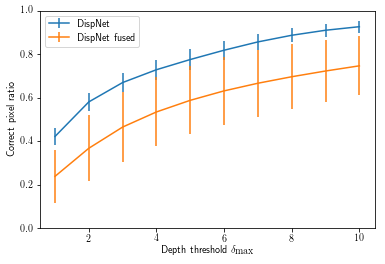

In [77]:
accs_input = []
accs_input_stds = []
accs_fusion = []
accs_fusion_stds = []
delta_maxes = range(1, 11)

def stats_for_delta(dframe, name, delta, include_missing):
    total = frame['{}-total-{}'.format(name, delta)]
    error = frame['{}-error-{}'.format(name, delta)]
    missing = frame['{}-missing-{}'.format(name, delta)]
    correct = frame['{}-correct-{}'.format(name, delta)]
    
    if include_missing:
        # Consider missing (uncomputed) values as errors
        accuracy = currect / total
    else:
        accuracy = correct / (total - missing)
        
    return accuracy.mean(), accuracy.std()

missing_are_errors = False
for i in delta_maxes:
    fus_acc_mean, fus_acc_std = stats_for_delta(frame, 'fusion', i, missing_are_errors)
    accs_fusion.append(fus_acc_mean)
    accs_fusion_stds.append(fus_acc_std)
    
    in_acc_mean, in_acc_std = stats_for_delta(frame, 'input', i, missing_are_errors)
    accs_input.append(in_acc_mean)
    accs_input_stds.append(in_acc_std)

# TODO look for best practices for mpl figures and use them
plt.errorbar(delta_maxes, accs_input, accs_input_stds, label='DispNet')
plt.errorbar(delta_maxes, accs_fusion, accs_fusion_stds, label='DispNet fused')
plt.xlabel(r"Depth threshold $\delta_{\textrm{max}}$")
plt.ylabel(r"Correct pixel ratio")
plt.ylim([0, 1])
plt.legend()
